In [36]:
import os
imdb_dir = "aclImdb"
train_dir = os.path.join(imdb_dir, 'train')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000
max_length = 100
training = 200
validation = 10000

tokenize = Tokenizer(num_words= max_words)
tokenize.fit_on_texts(texts)
sequence = tokenize.texts_to_sequences(texts)
word_index = tokenize.word_index
print("unique token words : ", len(word_index))
labels = np.array(labels)

data = pad_sequences(sequence, maxlen = max_length)
print("Shape of data : ", data.shape)
print("Shape of labels : ", labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
xtrain = data[:training]
ytrain = labels[:training]
x_validation = data[training: training+validation]
y_validation = labels[training: training+validation]

unique token words :  88582
Shape of data :  (25000, 100)
Shape of labels :  (25000,)


In [38]:
emb = 'glove.6B'
embedding_index = {}
f = open(os.path.join(emb, "glove.6B.100d.txt"), encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coef = np.asarray(values[1], dtype = 'float')
    embedding_index[word] = coef
f.close()
embedding_index

{'the': array(-0.038194),
 ',': array(-0.10767),
 '.': array(-0.33979),
 'of': array(-0.1529),
 'to': array(-0.1897),
 'and': array(-0.071953),
 'in': array(0.085703),
 'a': array(-0.27086),
 '"': array(-0.30457),
 "'s": array(0.58854),
 'for': array(-0.14401),
 '-': array(-1.2557),
 'that': array(-0.093337),
 'on': array(-0.21863),
 'is': array(-0.54264),
 'was': array(0.13717),
 'said': array(-0.13128),
 'with': array(-0.43608),
 'he': array(0.1225),
 'as': array(-0.32721),
 'it': array(-0.30664),
 'by': array(-0.20875),
 'at': array(0.1766),
 '(': array(0.19247),
 ')': array(-0.13797),
 'from': array(0.30731),
 'his': array(0.12883),
 "''": array(0.16478),
 '``': array(0.092672),
 'an': array(-0.4214),
 'be': array(-0.46953),
 'has': array(0.093736),
 'are': array(-0.51533),
 'have': array(0.15711),
 'but': array(-0.057078),
 'were': array(0.26874),
 'not': array(-0.19104),
 'this': array(-0.57058),
 'who': array(0.26164),
 'they': array(-0.07954),
 'had': array(0.63256),
 'i': arra

In [39]:
embedding_dimension = 100
embedding_matrix = np.zeros(shape = (max_words, embedding_dimension))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [40]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Embedding(max_words, embedding_dimension, input_length = max_length))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_4 (Dense)             (None, 32)                320032    
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [43]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [44]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 32, validation_data = (x_validation, y_validation))

Epoch 1/10
7/7 [==============================] - 11s 1s/step - loss: 0.9733 - acc: 0.5100 - val_loss: 0.8586 - val_acc: 0.5049
Epoch 2/10
7/7 [==============================] - 4s 677ms/step - loss: 0.4178 - acc: 0.8100 - val_loss: 0.9673 - val_acc: 0.4991
Epoch 3/10
7/7 [==============================] - 6s 973ms/step - loss: 0.2735 - acc: 0.8800 - val_loss: 1.0543 - val_acc: 0.5036
Epoch 4/10
7/7 [==============================] - 6s 996ms/step - loss: 0.1704 - acc: 0.9650 - val_loss: 1.1570 - val_acc: 0.5009
Epoch 5/10
7/7 [==============================] - 6s 989ms/step - loss: 0.1399 - acc: 0.9600 - val_loss: 1.2311 - val_acc: 0.5028
Epoch 6/10
7/7 [==============================] - 6s 979ms/step - loss: 0.0980 - acc: 0.9800 - val_loss: 1.3097 - val_acc: 0.5026
Epoch 7/10
7/7 [==============================] - 6s 1s/step - loss: 0.0691 - acc: 0.9700 - val_loss: 1.4104 - val_acc: 0.5037
Epoch 8/10
7/7 [==============================] - 6s 1s/step - loss: 0.0514 - acc: 0.9800 - val

In [45]:
model.save_weights('pretrained glove.h5')

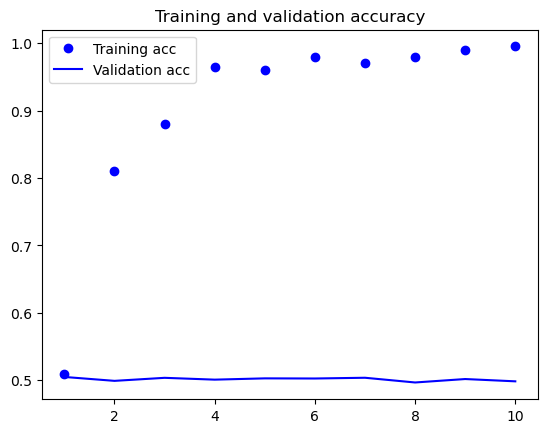

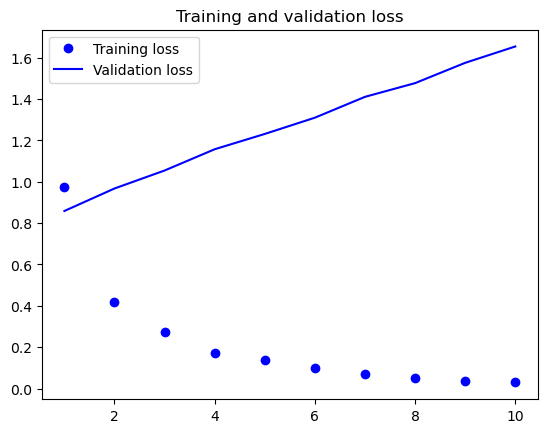

In [46]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [47]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Embedding(max_words, embedding_dimension, input_length = max_length))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [48]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [49]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 32, validation_data = (x_validation, y_validation))

Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 0.6963 - acc: 0.4300 - val_loss: 0.6914 - val_acc: 0.5260
Epoch 2/10
7/7 [==============================] - 6s 1s/step - loss: 0.5402 - acc: 0.9850 - val_loss: 0.6911 - val_acc: 0.5267
Epoch 3/10
7/7 [==============================] - 11s 2s/step - loss: 0.3749 - acc: 0.9850 - val_loss: 0.6982 - val_acc: 0.5243
Epoch 4/10
7/7 [==============================] - 12s 2s/step - loss: 0.2117 - acc: 1.0000 - val_loss: 0.6936 - val_acc: 0.5333
Epoch 5/10
7/7 [==============================] - 6s 1s/step - loss: 0.1134 - acc: 1.0000 - val_loss: 0.7068 - val_acc: 0.5366
Epoch 6/10
7/7 [==============================] - 11s 2s/step - loss: 0.0656 - acc: 1.0000 - val_loss: 0.7125 - val_acc: 0.5305
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.0400 - acc: 1.0000 - val_loss: 0.7092 - val_acc: 0.5360
Epoch 8/10
7/7 [==============================] - 11s 2s/step - loss: 0.0253 - acc: 1.0000 - val_loss: 0.709

In [52]:
test_dir = os.path.join(imdb_dir, 'test')
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
sequences = tokenize.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=max_length)
y_test = np.asarray(labels)

In [53]:
model.load_weights('pretrained glove.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 1.6282 - acc: 0.4983


[1.6281790733337402, 0.49827998876571655]